In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/databricksdatabricks-dolly-15k/dolly_15k.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/databricksdatabricks-dolly-15k/dolly_15k.csv')
df.head()

,instruction,context,response,category
0,When did Virgin Australia start operating?,"Virgin Australia, the trading name of Virgin A...",Virgin Australia commenced services on 31 Augu...,closed_qa
1,Which is a species of fish? Tope or Rope,NaN,Tope,classification
2,Why can camels survive for long without water?,NaN,Camels use the fat in their humps to keep them...,open_qa
3,"Alice's parents have three daughters: Amy, Jes...",NaN,The name of the third daughter is Alice,open_qa
4,When was Tomoaki Komorida born?,Komorida was born in Kumamoto Prefecture on Ju...,"Tomoaki Komorida was born on July 10,1981.",closed_qa


In [5]:
df.columns

Index(['instruction', 'context', 'response', 'category'], dtype='object')

In [6]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15011 entries, 0 to 15010
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  15011 non-null  object
 1   context      4466 non-null   object
 2   response     15011 non-null  object
 3   category     15011 non-null  object
dtypes: object(4)
memory usage: 469.2+ KB


In [7]:
# Count null values
df.isnull().sum()

instruction        0
context        10545
response           0
category           0
dtype: int64

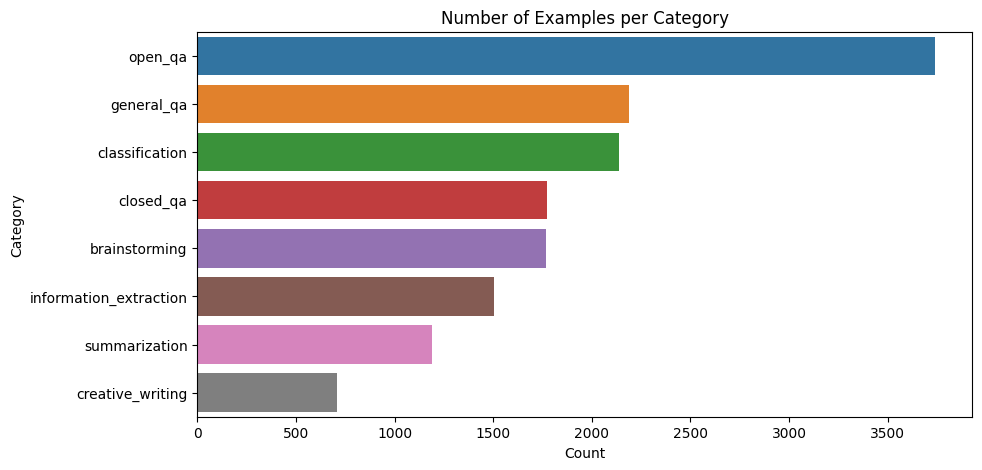

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title('Number of Examples per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

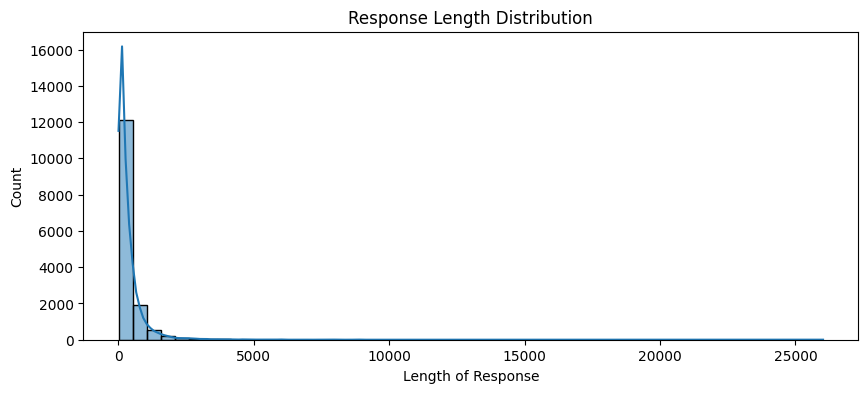

In [9]:
# Add text lengths
df['instruction_len'] = df['instruction'].str.len()
df['response_len'] = df['response'].str.len()

# Plot response lengths
plt.figure(figsize=(10,4))
sns.histplot(df['response_len'], bins=50, kde=True)
plt.title('Response Length Distribution')
plt.xlabel('Length of Response')
plt.show()

In [10]:
# Combine instruction and context into one input text
df['text'] = df['instruction'] + ' ' + df['context'].fillna('')

In [11]:
# Drop unused columns
X = df['text']
y = df['category']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create pipeline: TF-IDF + Logistic Regression
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression(max_iter=1000))])

In [14]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

         brainstorming       0.76      0.65      0.70       361
        classification       0.96      0.93      0.94       428
             closed_qa       0.57      0.72      0.64       347
      creative_writing       0.74      0.43      0.54       117
            general_qa       0.53      0.49      0.51       458
information_extraction       0.63      0.57      0.60       313
               open_qa       0.68      0.82      0.75       757
         summarization       0.45      0.31      0.37       222

              accuracy                           0.67      3003
             macro avg       0.66      0.62      0.63      3003
          weighted avg       0.67      0.67      0.67      3003



In [15]:
# Get class labels and feature names
labels = model.named_steps['clf'].classes_
features = model.named_steps['tfidf'].get_feature_names_out()
coefs = model.named_steps['clf'].coef_

# Print top words per category
for i, label in enumerate(labels):
    top10 = np.argsort(coefs[i])[-10:]
    print(f"\nTop words for category '{label}':")
    print(", ".join(features[top10]))


Top words for category 'brainstorming':
five, think, could, some, what, me, ways, give, best, list

Top words for category 'classification':
categorize, each, tell, whether, or, which, identify, classify, these, following

Top words for category 'closed_qa':
by, as, about, in, the, this, reference, and, paragraph, given

Top words for category 'creative_writing':
about, why, imagine, should, to, trip, story, you, describe, write

Top words for category 'general_qa':
kafka, spark, covid, buying, greatest, review, do, how, why, what

Top words for category 'information_extraction':
by, provided, from, comma, as, in, passage, the, and, extract

Top words for category 'open_qa':
thrones, how, titles, books, did, which, difference, who, name, what

Top words for category 'summarization':
to, was, points, please, in, as, is, of, the, and
